# UpBit 예측

In [1]:
#pip install prophet

In [2]:
#pip install --upgrade pystan

In [3]:
#pip install --upgrade fbprophet

In [4]:
!python --version

Python 3.11.7


In [5]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from prophet import Prophet as prh
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [6]:
BTC = fdr.DataReader("BTC/KRW")
BTC.head()
#btc_trade_price = []
#for i in BTC['Close']:
#  btc_trade_price.append(i)
#df = pd.DataFrame(btc_trade_price)
#df

Open          High           Low         Close  \
Date                                                                 
2014-09-17  482611.81250  483811.03125  468121.03125  473203.50000   
2014-09-18  472713.03125  476276.53125  430991.40625  442818.25000   
2014-09-19  442466.65625  447515.40625  401278.37500  411989.34375   
2014-09-20  411861.00000  441730.53125  406862.40625  426711.75000   
2014-09-21  425857.09375  430387.15625  410304.03125  416189.65625   

               Adj Close       Volume  
Date                                   
2014-09-17  473203.50000  21787470960  
2014-09-18  442818.25000  35976322560  
2014-09-19  411989.34375  39571102935  
2014-09-20  426711.75000  38469009780  
2014-09-21  416189.65625  27737663355

In [7]:
BTC['y'] = BTC['Close']
BTC['ds'] = BTC.index
BTC.head()

Open          High           Low         Close  \
Date                                                                 
2014-09-17  482611.81250  483811.03125  468121.03125  473203.50000   
2014-09-18  472713.03125  476276.53125  430991.40625  442818.25000   
2014-09-19  442466.65625  447515.40625  401278.37500  411989.34375   
2014-09-20  411861.00000  441730.53125  406862.40625  426711.75000   
2014-09-21  425857.09375  430387.15625  410304.03125  416189.65625   

               Adj Close       Volume             y         ds  
Date                                                            
2014-09-17  473203.50000  21787470960  473203.50000 2014-09-17  
2014-09-18  442818.25000  35976322560  442818.25000 2014-09-18  
2014-09-19  411989.34375  39571102935  411989.34375 2014-09-19  
2014-09-20  426711.75000  38469009780  426711.75000 2014-09-20  
2014-09-21  416189.65625  27737663355  416189.65625 2014-09-21

In [8]:
m = prh()
m.fit(BTC)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [ ]:
future = m.make_future_dataframe(periods=200)
future.tail()

NameError: name 'm' is not defined

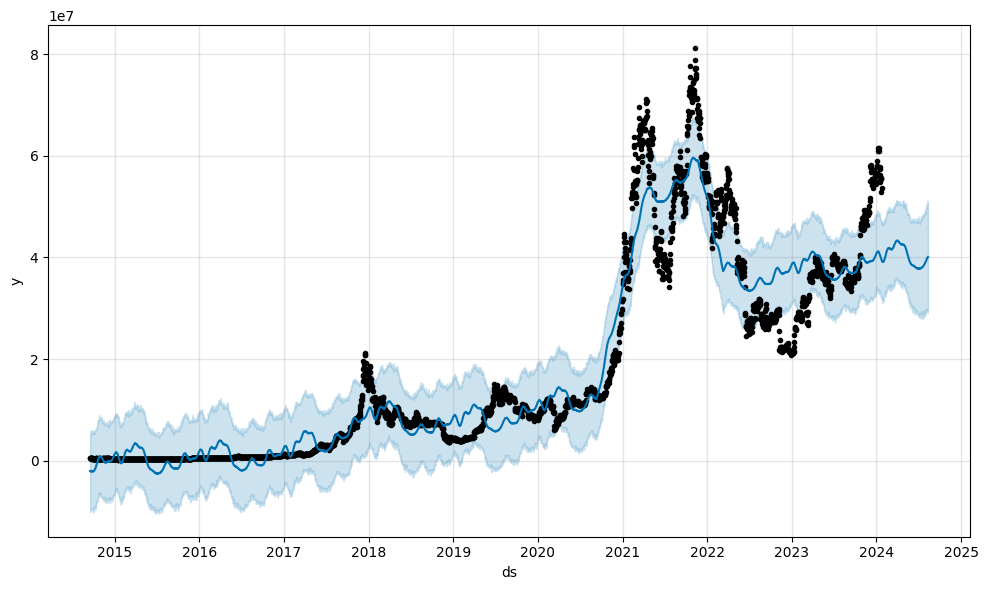

In [ ]:
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
forecast.to_json(orient='records', indent=4)

NameError: name 'forecast' is not defined

In [ ]:
fdr.DataReader("BTC/KRW")

Open          High           Low         Close  \
Date                                                                 
2014-09-17  4.826118e+05  4.838110e+05  4.681210e+05  4.732035e+05   
2014-09-18  4.727130e+05  4.762765e+05  4.309914e+05  4.428182e+05   
2014-09-19  4.424667e+05  4.475154e+05  4.012784e+05  4.119893e+05   
2014-09-20  4.118610e+05  4.417305e+05  4.068624e+05  4.267118e+05   
2014-09-21  4.258571e+05  4.303872e+05  4.103040e+05  4.161897e+05   
...                  ...           ...           ...           ...   
2024-01-20  5.524647e+07  5.625839e+07  5.383295e+07  5.559616e+07   
2024-01-21  5.560442e+07  5.594279e+07  5.536694e+07  5.565918e+07   
2024-01-22  5.566707e+07  5.591270e+07  5.542450e+07  5.548965e+07   
2024-01-23  5.550016e+07  5.565302e+07  5.281256e+07  5.292554e+07   
2024-01-24  5.336940e+07  5.376384e+07  5.297928e+07  5.335356e+07   

               Adj Close          Volume  
Date                                      
2014-09-17  4.732035e+05     21787470960  
2014-09-18  4.428182e+05     35976322560  
2014-09-19  4.119893e+05     39571102935  
2014-09-20  4.267118e+05     38469009780  
2014-09-21  4.161897e+05     27737663355  
...                  ...             ...  
2024-01-20  5.559616e+07  34401481859070  
2024-01-21  5.565918e+07  15478138977627  
2024-01-22  5.548965e+07  12480152304974  
2024-01-23  5.292554e+07  41982495185242  
2024-01-24  5.335356e+07  41121912717312  

[3417 rows x 6 columns]

In [ ]:
import requests

url = "https://api.upbit.com/v1/market/all?isDetails=false"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

[{"market":"KRW-BTC","korean_name":"비트코인","english_name":"Bitcoin"},{"market":"KRW-ETH","korean_name":"이더리움","english_name":"Ethereum"},{"market":"BTC-ETH","korean_name":"이더리움","english_name":"Ethereum"},{"market":"BTC-XRP","korean_name":"리플","english_name":"Ripple"},{"market":"BTC-ETC","korean_name":"이더리움클래식","english_name":"Ethereum Classic"},{"market":"BTC-CVC","korean_name":"시빅","english_name":"Civic"},{"market":"BTC-DGB","korean_name":"디지바이트","english_name":"DigiByte"},{"market":"BTC-SC","korean_name":"시아코인","english_name":"Siacoin"},{"market":"BTC-SNT","korean_name":"스테이터스네트워크토큰","english_name":"Status Network Token"},{"market":"BTC-WAVES","korean_name":"웨이브","english_name":"Waves"},{"market":"BTC-NMR","korean_name":"뉴메레르","english_name":"Numeraire"},{"market":"BTC-XEM","korean_name":"넴","english_name":"NEM"},{"market":"BTC-QTUM","korean_name":"퀀텀","english_name":"Qtum"},{"market":"BTC-BAT","korean_name":"베이직어텐션토큰","english_name":"Basic Attention Token"},{"market":"BTC-LSK","kore

In [ ]:
pip install finan

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement finan (from versions: none)
ERROR: No matching distribution found for finan


# 분 캔들 시세 조회

In [ ]:
import requests

url = "https://api.upbit.com/v1/candles/minutes/1?market=KRW-BTC&to=2024-01-23T00%3A00%3A00%2B09%3A00&count=200"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)
response_json = response.json()
print(response_json)

[{'market': 'KRW-BTC', 'candle_date_time_utc': '2024-01-22T14:59:00', 'candle_date_time_kst': '2024-01-22T23:59:00', 'opening_price': 56210000.0, 'high_price': 56219000.0, 'low_price': 56182000.0, 'trade_price': 56208000.0, 'timestamp': 1705935599594, 'candle_acc_trade_price': 68251645.29997, 'candle_acc_trade_volume': 1.21424178, 'unit': 1}, {'market': 'KRW-BTC', 'candle_date_time_utc': '2024-01-22T14:58:00', 'candle_date_time_kst': '2024-01-22T23:58:00', 'opening_price': 56221000.0, 'high_price': 56221000.0, 'low_price': 56175000.0, 'trade_price': 56219000.0, 'timestamp': 1705935536575, 'candle_acc_trade_price': 42657356.66919, 'candle_acc_trade_volume': 0.75893778, 'unit': 1}, {'market': 'KRW-BTC', 'candle_date_time_utc': '2024-01-22T14:57:00', 'candle_date_time_kst': '2024-01-22T23:57:00', 'opening_price': 56233000.0, 'high_price': 56245000.0, 'low_price': 56158000.0, 'trade_price': 56210000.0, 'timestamp': 1705935479816, 'candle_acc_trade_price': 156445293.73395, 'candle_acc_trade

In [ ]:
price_min_list = []
for i in response_json:
  price_min_list.append(i)
df = pd.DataFrame(price_min_list)
df

market candle_date_time_utc candle_date_time_kst  opening_price  \
0    KRW-BTC  2024-01-22T14:59:00  2024-01-22T23:59:00     56210000.0   
1    KRW-BTC  2024-01-22T14:58:00  2024-01-22T23:58:00     56221000.0   
2    KRW-BTC  2024-01-22T14:57:00  2024-01-22T23:57:00     56233000.0   
3    KRW-BTC  2024-01-22T14:56:00  2024-01-22T23:56:00     56221000.0   
4    KRW-BTC  2024-01-22T14:55:00  2024-01-22T23:55:00     56161000.0   
..       ...                  ...                  ...            ...   
195  KRW-BTC  2024-01-22T11:44:00  2024-01-22T20:44:00     56324000.0   
196  KRW-BTC  2024-01-22T11:43:00  2024-01-22T20:43:00     56341000.0   
197  KRW-BTC  2024-01-22T11:42:00  2024-01-22T20:42:00     56342000.0   
198  KRW-BTC  2024-01-22T11:41:00  2024-01-22T20:41:00     56356000.0   
199  KRW-BTC  2024-01-22T11:40:00  2024-01-22T20:40:00     56374000.0   

     high_price   low_price  trade_price      timestamp  \
0    56219000.0  56182000.0   56208000.0  1705935599594   
1    56221000.0  56175000.0   56219000.0  1705935536575   
2    56245000.0  56158000.0   56210000.0  1705935479816   
3    56286000.0  56217000.0   56233000.0  1705935418660   
4    56216000.0  56151000.0   56181000.0  1705935359821   
..          ...         ...          ...            ...   
195  56340000.0  56301000.0   56301000.0  1705923899982   
196  56341000.0  56312000.0   56324000.0  1705923836968   
197  56355000.0  56320000.0   56327000.0  1705923776158   
198  56356000.0  56325000.0   56355000.0  1705923717019   
199  56420000.0  56355000.0   56356000.0  1705923659389   

     candle_acc_trade_price  candle_acc_trade_volume  unit  
0              6.825165e+07                 1.214242     1  
1              4.265736e+07                 0.758938     1  
2              1.564453e+08                 2.782477     1  
3              1.084728e+08                 1.928261     1  
4              3.929935e+08                 6.994730     1  
..                      ...                      ...   ...  
195            1.326021e+08                 2.354838     1  
196            9.917967e+07                 1.761002     1  
197            4.165812e+07                 0.739481     1  
198            1.242712e+08                 2.205802     1  
199            2.149276e+08                 3.812266     1  

[200 rows x 11 columns]

https://api.upbit.com/v1/candles/minutes/1?market=KRW-BTC&to=2024-01-23T00%3A00%3A00%2B09%3A00&count=200

In [ ]:
df.candle_date_time_kst[:]

0      2024-01-22T23:59:00
1      2024-01-22T23:58:00
2      2024-01-22T23:57:00
3      2024-01-22T23:56:00
4      2024-01-22T23:55:00
              ...         
195    2024-01-22T20:44:00
196    2024-01-22T20:43:00
197    2024-01-22T20:42:00
198    2024-01-22T20:41:00
199    2024-01-22T20:40:00
Name: candle_date_time_kst, Length: 200, dtype: object

In [ ]:
url_date = df.candle_date_time_kst[199][:13] + '%3A' + df.candle_date_time_kst[199][14:16] +'%3A' +  df.candle_date_time_kst[199][17:19] 
url_date

'2024-01-22T17%3A20%3A00'

In [ ]:
url = "https://api.upbit.com/v1/candles/minutes/1?market=KRW-BTC&to=2024-01-23T00%3A00%3A00%2B09%3A00&count=200"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)
response_json = response.json()
print(response_json)
price_min_list = []
for i in response_json:
  price_min_list.append(i)
df = pd.DataFrame(price_min_list)
df

url_date = df.candle_date_time_kst[199][:13] + '%3A' + df.candle_date_time_kst[199][14:16] +'%3A' +  df.candle_date_time_kst[199][17:19] 
url_date

for i in range(7):
    
    url = "https://api.upbit.com/v1/candles/minutes/1?market=KRW-BTC&to="+ url_date +"%2B09%3A00&count=200"

    headers = {"accept": "application/json"}

    response = requests.get(url, headers=headers)
    response_json = response.json()
    print(response_json)
    price_min_list = []
    for j in response_json:
        price_min_list.append(j)
        
    df = pd.DataFrame(price_min_list)
    url_date = df.candle_date_time_kst[199][:13] + '%3A' + df.candle_date_time_kst[199][14:16] +'%3A' +  df.candle_date_time_kst[199][17:19] 
df

[{'market': 'KRW-BTC', 'candle_date_time_utc': '2024-01-22T14:59:00', 'candle_date_time_kst': '2024-01-22T23:59:00', 'opening_price': 56210000.0, 'high_price': 56219000.0, 'low_price': 56182000.0, 'trade_price': 56208000.0, 'timestamp': 1705935599594, 'candle_acc_trade_price': 68251645.29997, 'candle_acc_trade_volume': 1.21424178, 'unit': 1}, {'market': 'KRW-BTC', 'candle_date_time_utc': '2024-01-22T14:58:00', 'candle_date_time_kst': '2024-01-22T23:58:00', 'opening_price': 56221000.0, 'high_price': 56221000.0, 'low_price': 56175000.0, 'trade_price': 56219000.0, 'timestamp': 1705935536575, 'candle_acc_trade_price': 42657356.66919, 'candle_acc_trade_volume': 0.75893778, 'unit': 1}, {'market': 'KRW-BTC', 'candle_date_time_utc': '2024-01-22T14:57:00', 'candle_date_time_kst': '2024-01-22T23:57:00', 'opening_price': 56233000.0, 'high_price': 56245000.0, 'low_price': 56158000.0, 'trade_price': 56210000.0, 'timestamp': 1705935479816, 'candle_acc_trade_price': 156445293.73395, 'candle_acc_trade

market candle_date_time_utc candle_date_time_kst  opening_price  \
0    KRW-BTC  2024-01-21T15:38:00  2024-01-22T00:38:00     57728000.0   
1    KRW-BTC  2024-01-21T15:37:00  2024-01-22T00:37:00     57747000.0   
2    KRW-BTC  2024-01-21T15:36:00  2024-01-22T00:36:00     57745000.0   
3    KRW-BTC  2024-01-21T15:35:00  2024-01-22T00:35:00     57718000.0   
4    KRW-BTC  2024-01-21T15:34:00  2024-01-22T00:34:00     57743000.0   
..       ...                  ...                  ...            ...   
195  KRW-BTC  2024-01-21T12:23:00  2024-01-21T21:23:00     57622000.0   
196  KRW-BTC  2024-01-21T12:22:00  2024-01-21T21:22:00     57589000.0   
197  KRW-BTC  2024-01-21T12:21:00  2024-01-21T21:21:00     57625000.0   
198  KRW-BTC  2024-01-21T12:20:00  2024-01-21T21:20:00     57588000.0   
199  KRW-BTC  2024-01-21T12:19:00  2024-01-21T21:19:00     57624000.0   

     high_price   low_price  trade_price      timestamp  \
0    57729000.0  57622000.0   57630000.0  1705851539926   
1    57747000.0  57675000.0   57712000.0  1705851479160   
2    57785000.0  57745000.0   57747000.0  1705851419678   
3    57768000.0  57682000.0   57745000.0  1705851359984   
4    57744000.0  57718000.0   57718000.0  1705851296590   
..          ...         ...          ...            ...   
195  57624000.0  57589000.0   57619000.0  1705839837813   
196  57624000.0  57587000.0   57622000.0  1705839778073   
197  57625000.0  57588000.0   57589000.0  1705839718963   
198  57625000.0  57588000.0   57625000.0  1705839656739   
199  57625000.0  57588000.0   57588000.0  1705839596103   

     candle_acc_trade_price  candle_acc_trade_volume  unit  
0              1.541860e+08                 2.673737     1  
1              2.455368e+08                 4.255524     1  
2              1.401825e+08                 2.426845     1  
3              2.299513e+08                 3.984705     1  
4              8.077470e+07                 1.399030     1  
..                      ...                      ...   ...  
195            2.150175e+07                 0.373187     1  
196            7.057053e+07                 1.225355     1  
197            3.579756e+07                 0.621558     1  
198            5.653978e+07                 0.981256     1  
199            6.449872e+07                 1.119553     1  

[200 rows x 11 columns]

# 시세 현재가(Ticker) 조회

In [ ]:
url = "https://api.upbit.com/v1/ticker?markets=KRW-BTC"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)
response_json = response.json()
print(response_json)

[{'market': 'KRW-BTC', 'trade_date': '20240124', 'trade_time': '080457', 'trade_date_kst': '20240124', 'trade_time_kst': '170457', 'trade_timestamp': 1706083497383, 'opening_price': 55389000.0, 'high_price': 55690000.0, 'low_price': 54446000.0, 'trade_price': 55187000.0, 'prev_closing_price': 55389000.0, 'change': 'FALL', 'change_price': 202000.0, 'change_rate': 0.0036469335, 'signed_change_price': -202000.0, 'signed_change_rate': -0.0036469335, 'trade_volume': 0.00214931, 'acc_trade_price': 93024909841.14421, 'acc_trade_price_24h': 414464001390.852, 'acc_trade_volume': 1691.61874826, 'acc_trade_volume_24h': 7645.01210256, 'highest_52_week_price': 66779000.0, 'highest_52_week_date': '2024-01-11', 'lowest_52_week_price': 26707000.0, 'lowest_52_week_date': '2023-03-10', 'timestamp': 1706083497405}]


In [ ]:
price = []
for i in response_json:
  price.append(i)
df = pd.DataFrame(price)
df

market trade_date trade_time trade_date_kst trade_time_kst  \
0  KRW-BTC   20240124     080457       20240124         170457   

   trade_timestamp  opening_price  high_price   low_price  trade_price  ...  \
0    1706083497383     55389000.0  55690000.0  54446000.0   55187000.0  ...   

   trade_volume acc_trade_price  acc_trade_price_24h  acc_trade_volume  \
0      0.002149    9.302491e+10         4.144640e+11       1691.618748   

   acc_trade_volume_24h  highest_52_week_price  highest_52_week_date  \
0           7645.012103             66779000.0            2024-01-11   

   lowest_52_week_price  lowest_52_week_date      timestamp  
0            26707000.0           2023-03-10  1706083497405  

[1 rows x 26 columns]

In [ ]:
df[['opening_price','high_price','low_price','trade_price']]

opening_price  high_price   low_price  trade_price
0     55389000.0  55690000.0  54446000.0   55187000.0